# Klasse für den K-Means-Algorithmus
## Quellen

https://github.com/gkabbe/Python-Kurs2015/wiki/5---Numpy
Berechnet den Massenmittelpunkt
https://mubaris.com/posts/kmeans-clustering/

In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
class k_Means():
    """
        Erhaelt eine Punkt-Liste als Array
        die Anzahl der Clusterpunkte
        eventuell die Cluster-Liste, wenn nicht,
        werden die Cluster-Punkte zufaellig aus den
        Punkten der PL bestimmt
    """
    def __init__(self, punkte, anzahl, clLi=None):        
        #print(self.clLi)
        self.puLi = punkte
        self.anzahlCluster = anzahl
        self.laengePuLi, self.dimPunkte =self.puLi.shape
        if clLi:
            self.clLi=clLi
        else:
            self.bestimmeCL()
        print("StartCluster: \n", self.clLi)
        self.cluster= np.zeros((self.laengePuLi,),dtype=int)
        self.error=20
        self.cls=[]
    def bestimmeCL(self):
        #zufaellige Auswahl der Clusterpunkte aus den gegebenen
        self.clLi=np.zeros((self.anzahlCluster,self.dimPunkte))#,dtype=int)
        clListe=[]
        i=0
        while len(clListe) < self.anzahlCluster:
            index= random.randint(0,self.laengePuLi-1)
            cl=self.puLi[index]
            if not self.istEnthalten(clListe,cl): #vermeide Doppelte
                clListe.append(cl)
                self.clLi[i]=self.puLi[index]
                i+=1
                
    def istEnthalten(self,array,el):
        for e in array:
            if (e==el).all():
                return True
        return False
        
    def einteilRunde(self):        
        for i in range(self.laengePuLi):
            #print("Abstaende: ",self.clLi,self.puLi[i])
            abstand=np.linalg.norm(self.clLi-self.puLi[i],axis=1)
            #print(abstand)
            cluster = np.argmin(abstand)
            #print(cluster)
            self.cluster[i]=cluster        
        self.clLi_old=np.copy(self.clLi)
        self.cls.append(self.clLi_old)
        for i in range(self.anzahlCluster):            
            punkte= [self.puLi[j] for j in range(self.laengePuLi) if self.cluster[j]==i]                 
            self.clLi[i]=np.mean(punkte,axis =0)
        print("Neue Cluster: \n", self.clLi)
        self.error = np.linalg.norm(self.clLi-self.clLi_old)
        print(self.error)
        
    def einteilen(self,bis=0):           
        self.einteilRunde()
        while self.error> bis:            
            self.einteilRunde()            
        self.gibZahlen()
            
    def gibZahlen(self):
        print("Verteilung der Punkte auf die Cluster")
        #liefert die Anzahlen der Punkte je Cluster
        for i in range(self.anzahlCluster):            
            punkte= [self.puLi[j] for j in range(self.laengePuLi) if self.cluster[j]==i]
            print(i,len(punkte))
        
    def zeigen(self):
        fig = plt.figure()
        fig.suptitle("Einteilung in Cluster")
        ax = fig.add_subplot(111)        
        farben=["red","yellow","blue","green","lightblue","grey"]*2
        m=["+","x","*","o","v"]*20
        for i in range(self.anzahlCluster):
            xs= [self.puLi[j][0] for j in range(self.laengePuLi) if self.cluster[j]==i]
            ys= [self.puLi[j][1] for j in range(self.laengePuLi) if self.cluster[j]==i]
            #print("xs: ",xs," ys: ",ys)            
            ax.scatter(xs,ys, c=farben[i],label=i)        
        si=-1#Markerzaehler
        for c in self.cls:            
            si+=1
            for i in range(self.anzahlCluster):
                ax.scatter(c[i][0],c[i][1], c="black",marker=m[si])                      
        #for c in self.clLi:
            #ax.scatter(c[0],c[1], c="black",marker=m[0])
        maxis=np.amax(self.puLi,0)
        minis=np.amin(self.puLi,0)
        zusatz = (maxis - minis)//20 +1
        #print("Maxis ",maxis, " Minis: ",minis,"Zusatz:", zusatz)
        plt.axis([int(minis[0])-zusatz[0],int(maxis[0])+zusatz[0],
                  int(minis[1])-zusatz[1],int(maxis[1])+zusatz[1]])
        fig.legend(loc=2)
        plt.show()
        #fig.savefig("cluster.png", dpi=200)

Testdurchlauf mit den Daten aus dem [xclara.csv-Datenset](https://vincentarelbundock.github.io/Rdatasets/csv/cluster/xclara.csv). 

Die schwarzen Punkte im Graph markieren die "Wanderung" der Clusterzentren vom Zufallswert zu den echten Mittelpunkten.

Array der eingelesenen Datenpunkte:
 [[  2.072345  -3.241693]
 [ 17.93671   15.78481 ]
 [  1.083576   7.319176]
 ...
 [ 64.46532  -10.50136 ]
 [ 90.72282  -12.25584 ]
 [ 64.87976  -24.87731 ]]
StartCluster: 
 [[ 16.6546    -1.519889]
 [ 69.38057  -12.99076 ]
 [ 43.37792   60.65264 ]]
Neue Cluster: 
 [[  9.61807825  10.43847413]
 [ 70.11445215 -10.11294352]
 [ 40.62438425  59.62550084]]
14.490426903746522
Neue Cluster: 
 [[  9.4780459   10.686052  ]
 [ 69.92418447 -10.11964119]
 [ 40.68362784  59.71589274]]
0.3589303634622165
Neue Cluster: 
 [[  9.4780459   10.686052  ]
 [ 69.92418447 -10.11964119]
 [ 40.68362784  59.71589274]]
0.0
Verteilung der Punkte auf die Cluster
0 899
1 952
2 1149


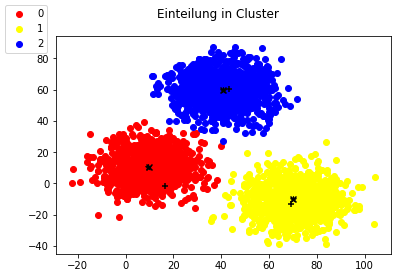

In [7]:
def csv2array(datei):
    # liest eine csv-Datei ein und liefert ein PunktArray
    arr=np.loadtxt(datei,delimiter=",",
                   skiprows=1,
                   usecols=(1,2))
    #erste Zeile ueberspringen und nur die Spalten 1 und 2 verwenden
    return arr                    

punktliste= [[2,12],[3,11],[3,8],[5,4],[7,5],[7,3],[10,8],[13,8]]
puAr=np.array(punktliste,dtype=int)    
puAr=csv2array("xclara.csv")
print("Array der eingelesenen Datenpunkte:\n",puAr)
k=k_Means(puAr,3)
k.einteilen()
k.zeigen()


Beispiel mit dem Iris-Datenset, bei dem sich die 3 Arten nicht klar trennen lassen. Abhängig von den Startwerten lässt sich aber zumindest eine Art abtrennen.

In [9]:
def csv2array(datei):
    # liest eine csv-Datei ein und liefert ein PunktArray
    arr=np.loadtxt(datei,delimiter=";",
                   skiprows=1,
                   usecols=(1,2,3,4))
    #erste Zeile ueberspringen und nur die Spalten 1 bis 4 verwenden
    return arr                    
  
puAr=csv2array("iris.csv")
#print("Array der eingelesenen Datenpunkte:\n",puAr)
k=k_Means(puAr,3)
k.einteilen()
k.zeigen()

IndexError: list index out of range